![image.png](https://i.imgur.com/1WaY7aA.png)

---



---



#  Data Science and AI
## Lab 10.2: CNN with Keras
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [3]:
# import keras
from keras.datasets import cifar10
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.models import Sequential
from keras.utils import to_categorical

ModuleNotFoundError: No module named 'keras'

In [0]:
from keras.callbacks import TensorBoard

## Load data

In [5]:
(X_train, t_train), (X_test, t_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

## Check some data

In [0]:
def check_one(data, label, id = None, actual = None, compare = False):
    # check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3, 3))
    plt.imshow(im)
    
    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [0]:
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]

        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

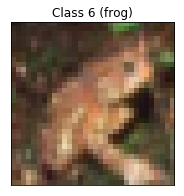

In [9]:
check_one(X_train, t_train.flatten())

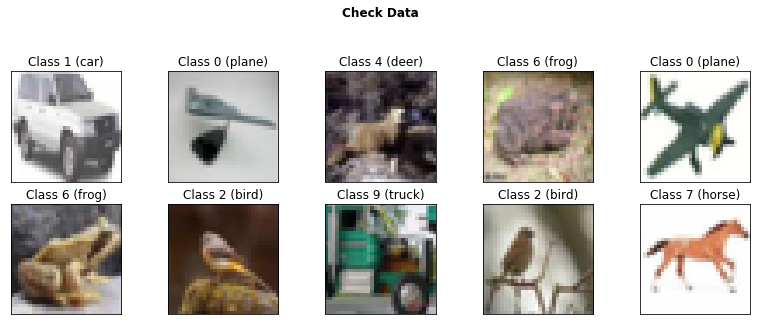

In [10]:
check_ten(X_train, t_train.flatten())

## Prepare data

In [0]:
# Prepare input data
_, img_rows, img_cols, img_channels = X_train.shape
num_classes = len(set(t_train.flatten()))

# Convert the target to categorical
y_train = to_categorical(
    t_train,
    num_classes = num_classes,
    dtype = 'uint8')
y_test = to_categorical(
    t_test,
    num_classes = num_classes,
    dtype = 'uint8')

## Create the model's architecture

In [12]:
model = Sequential()

W0619 23:42:17.465599 139965525411712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [13]:
model.add(Conv2D(48, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Conv2D(48, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

W0619 23:42:28.264440 139965525411712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 23:42:28.282104 139965525411712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 23:42:28.335714 139965525411712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0619 23:42:28.342012 139965525411712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0619 23:42:28.354710 139965525411712 de

In [14]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 96)        83040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 96)          0         
__________

## Compile the model

In [15]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

W0619 23:42:38.969445 139965525411712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0619 23:42:39.004989 139965525411712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



## Fit the training data

In [0]:
tensorboard = TensorBoard(log_dir = 'logs')

In [0]:
%%time
# Fit the model on a training set
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = 100,
    batch_size = 100,
    callbacks = [tensorboard],
    verbose = 1)
print()

W0619 23:42:48.053726 139965525411712 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples


W0619 23:42:49.424210 139965525411712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0619 23:42:49.425598 139965525411712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/100
40000/40000 [==============================] - 413s 10ms/step - loss: 14.5046 - acc: 0.0999 - val_loss: 14.4805 - val_acc: 0.1016
Epoch 2/100
40000/40000 [==============================] - 416s 10ms/step - loss: 14.5139 - acc: 0.0995 - val_loss: 14.4805 - val_acc: 0.1016
Epoch 3/100
40000/40000 [==============================] - 418s 10ms/step - loss: 14.5135 - acc: 0.0995 - val_loss: 14.4805 - val_acc: 0.1016
Epoch 4/100
40000/40000 [==============================] - 417s 10ms/step - loss: 14.5135 - acc: 0.0995 - val_loss: 14.4805 - val_acc: 0.1016
Epoch 5/100
40000/40000 [==============================] - 415s 10ms/step - loss: 14.5123 - acc: 0.0996 - val_loss: 14.4805 - val_acc: 0.1016
Epoch 6/100
40000/40000 [==============================] - 415s 10ms/step - loss: 14.5123 - acc: 0.0996 - val_loss: 14.4805 - val_acc: 0.1016
Epoch 7/100
40000/40000 [==============================] - 415s 10ms/step - loss: 14.5115 - acc: 0.0997 - val_loss: 14.4805 - val_acc: 0.1016
Epoch 

## Create predictions

In [0]:
%%time
predictions = model.predict_classes(X_test)

CPU times: user 56.6 s, sys: 994 ms, total: 57.6 s
Wall time: 55.6 s


## Evaluate the model

In [0]:
score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

10000/10000 [==============================] - 59s 6ms/step

Test loss: 0.758106, Test accuracy: 0.770800


In [0]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [0]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

   |   0   1   2   3   4   5   6   7   8   9 
---------------------------------------------
  0| 759  18  43  23  15   4   7   7  99  25 
  1|   8 907   1   3   3   3   6   1  19  49 
  2|  54   2 658  76  58  53  76   8   8   7 
  3|  18   8  44 610  52 118 103  17  14  16 
  4|  17   3  46  72 726  28  59  35  10   4 
  5|  10   2  41 186  31 655  31  29   6   9 
  6|   6   5  23  54  16  13 868   3   9   3 
  7|  12   1  19  59  53  37  22 778   3  16 
  8|  37  25   9   8   3   4   6   1 889  18 
  9|  22  52   4  14   3   2   7   3  35 858 


## Visualisation of cost

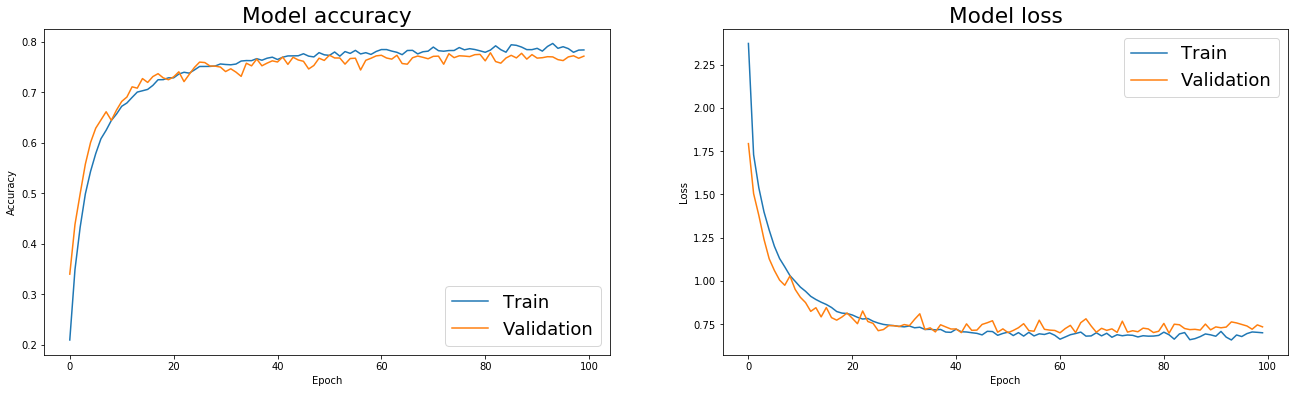

In [0]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(model.history.history['acc'])
ax[0].plot(model.history.history['val_acc'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(model.history.history['loss'])
ax[1].plot(model.history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

## Results

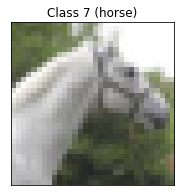

In [0]:
check_one(X_test, predictions, actual = y_test, compare = True)

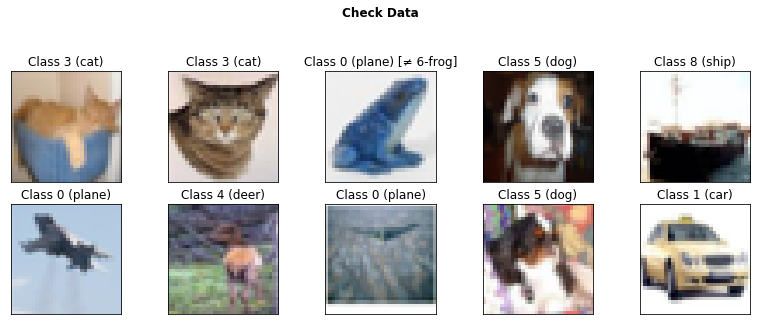

In [0]:
check_ten(X_test, predictions, y_test, True)

## Save and Load models and weights

### Save

In [0]:
# save model
model_json = model.to_json()
with open('../data/model.json', 'w') as json_file:
    json_file.write(model_json)
# save weigths
model.save_weights('../data/model.h5')

### Load

In [0]:
# import the module to convert a json file to a model
from keras.models import model_from_json

In [0]:
# create a new model
new_model = Sequential()

In [0]:
# load model
with open('../data/model.json', 'r') as json_file:
    model_json = json_file.read()
new_model = model_from_json(model_json)

# load weights
new_model.load_weights('../data/model.h5')

In [0]:
# compile the new model
new_model.compile(optimizer = 'adam', 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])

**NOTE**: NO need to fit the new model as the weigths are already set!

Use the new model to
- Predict
- Evaluate
- Chart

>

>

>



---



---



> > > > > > > > > © 2019 Data Science Institute of Australia


---



---



